# Корреляция

Важно выявить и количественно оценить степень зависимости переменных в вашем наборе данных друг от друга. С одной стороны, выявление зависимостей это вообще базовая задача анализа данных. Переменные в наборе данных могут быть связаны по разным причинам.

Например:

- Одна переменная может быть причиной или зависеть от значений другой переменной.
- Одна переменная может быть слабо связана с другой переменной.
- Две переменные могут зависеть от третьей неизвестной переменной.

Статистическая взаимосвязь между двумя переменными называется их корреляцией.

Корреляция может быть положительной, что означает, что обе переменные изменяются в одном направлении, или отрицательной, что означает, что при увеличении значения одной переменной значения другой уменьшаются. Корреляция также может быть нейтральной или равной нулю, что означает, что переменные не связаны.

Производительность некоторых алгоритмов может ухудшаться, если две или более переменные тесно связаны, что называется мультиколлинеарностью. Примером является линейная регрессия, где одна из сильно коррелирующих переменных должна быть удалена для повышения точности модели.

Нас также может интересовать корреляция между регрессорами и зависимой переменной, чтобы понять, какие из регрессоров релевантны для построения модели.

Структура связи может быть известна, например, она может быть линейной, или мы можем не знать, существует ли связь между двумя переменными и какова ее структура. В зависимости от того, что известно о связи и распределении переменных, могут быть рассчитаны различные коэффициенты корреляции. Мы рассмотрим корреляцию Пирсона, Спирмена и Кендалла.

## Ковариация.

Прежде чем мы перейдем к расчету некоторых коэффициентов корреляции, нам нужно рассмотреть важный статистический элемент, называемый ковариацией.

Самая простая зависимость, которую можно предположить между двумя переменными -- линейная. Её можно измерить с помощью ковариации, которая определяется как 

$$ cov(X, Y) = E(X - E(X))(Y_i - E(Y)) $$
<!-- $$ cov(X, Y) = \frac{1}{n} \sum_i(X_i - \bar{X})(Y_i - \bar{Y}) $$ -->

Знак ковариации можно интерпретировать как указание на то, изменяются ли две переменные в одном направлении (положительный) или в разных направлениях (отрицательный). Величину корреляции проинтерпретировать нельзя, так как она зависит от единиц измерения обеих величин. Для независимых случайных величин корреляция равна нулю, хотя обратное верно не всегда.

Для выборки можно рассчитать аналог

$$\frac{1}{n} \sum_i (X_i  - \overline{X})(Y_i  - \overline{Y})$$


In [59]:
# calculate the covariance between two variables
from numpy.random import randn, seed
from numpy import cov
# seed random number generator
seed(1)
# prepare data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)
# calculate covariance matrix
covariance = cov(data1, data2)
print(covariance)

[[385.33297729 389.7545618 ]
 [389.7545618  500.38006058]]


## Корреляция Пирсона

Корреляция Пирсона (названная в честь Карла Пирсона) представляет собой ковариацию, нормированную на стандартные отклонения обеих переменных:

$$
r = \frac{{\sum_i (X_i  - \overline{X})(Y_i  - \overline{Y})}}{{\sqrt{{\sum_i (X_i  - \overline{X})^2 \cdot \sum_i (Y_i  - \overline{Y})^2}}}}
$$


Предпосылки:

- Величины должны быть непрерывными.
- Нет выбросов.
- Зависимость линейная
- Гомоскедастичность

In [60]:
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
# seed random number generator
seed(1)
# prepare data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)
# calculate Pearson's correlation
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.888


Существует также процедура проверки гипотезы на значимость

- Нулевая гипотеза: 
$$ H_0: \rho = 0 $$

- Альтернативная гипотеза: 
$$ H_1: \rho \neq 0 $$

- Тестовая статистика: 
$$ t = r \sqrt{\frac{n - 2}{1 - r^2}} $$

- Распределение: t-распределение с \( n - 2 \) степенями свободы при условии что X и Y имеют совместное нормальное распределение при выполнеии $H_0$.


## Корреляция Спирмена

Корреляция Спирмена предполагает наличие уже не линейной, а монотонной зависимости.

$$ r_s = \frac{\sum_{i=1}^n (R(X_i) - \overline{R(X)})(R(Y_i) - \overline{R(Y)})}{\sqrt{\sum_{i=1}^n (R(X_i) - \overline{R(X)})^2 \cdot \sum_{i=1}^n (R(Y_i) - \overline{R(Y)})^2}} = 1 - \frac{6 \sum_{i=1}^n (R(X_i) - R(y_i))^2}{n(n^2 - 1)}
 $$

 где $R(x)$ -- ранг наблюдения. В классической постановке -- номер наблюдения в вариационном ряде. Корреляция Спирмена является просто корреляцией Пирсона для рангов наблюдений. 0 означает отсутствие зависимости, а +1 и -1 -- наличие строгой монотонной зависимости, положительной или отрицательной соответственно.




In [61]:
# calculate the spearmans's correlation between two variables
from numpy.random import randn
from numpy.random import seed
from scipy.stats import spearmanr
# seed random number generator
seed(1)

# prepare data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)
# calculate spearman's correlation
corr, _ = spearmanr(data1, data2)
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.872


Аналогично Пирсону, существует тест для проверки значимости корреляции.

 - Нулевая гипотеза: 
$$ H_0: \rho_s = 0 $$

- Альтернативная гипотеза: 
$$ H_1: \rho_s \neq 0 $$

- Тестовая статистика: 
$$ t = r_s \sqrt{\frac{n - 2}{1 - r_s^2}} $$

- Распределение: t-распределение с \( n - 2 \) степенями свободы. Обратите внимание, для этого теста предпосылка о нормальности не требуется.

## Корреляция Кендалла


Рассмотрим ещё один вариант, который подходит для дискретных выборок. В общем виде корреляция Спирмена и Кендалла являются частными случаями общего понятия [ранговой корреляции](https://en.wikipedia.org/wiki/Rank_correlation#General_correlation_coefficient). Коэффициент $\tau_B$ Кендалла определяется как:
$$
\tau_B = \frac{n_c - n_d}{\sqrt{(n_0 - n_1)(n_0 - n_2)}}
$$
где
$$
n_0 = \frac{n(n - 1)}{2}
$$
$$
n_1 = \sum_i \frac{t_i(t_i - 1)}{2}
$$
$$
n_2 = \sum_j \frac{u_j(u_j - 1)}{2}
$$

$n_c$ — количество согласованных пар, то есть пар, где \(0 < i < j < n\), для которых \(x_i < x_j\) и \(y_i < y_j\) или \(x_i > x_j\) и \(y_i > y_j\).

$n_d$ — количество несогласованных пар, то есть пар, где \(0 < i < j < n\), для которых \(x_i < x_j\) и \(y_i > y_j\) или \(x_i > x_j\) и \(y_i < y_j\).

$t_i$ — количество совпадающих значений в \(i\)-й группе совпадений для эмпирического распределения \(X\).

$u_j$ — количество совпадающих значений в \(j\)-й группе совпадений для эмпирического распределения \(Y\).


In [5]:
# calculate the kendall's correlation between two variables
from numpy.random import randn
from numpy.random import seed
from scipy.stats import kendalltau
# seed random number generator
seed(1)
# prepare data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)
# calculate spearman's correlation
corr, _ = kendalltau(data1, data2)
print('Kendall correlation: %.3f' % corr)

Kendall correlation: 0.688


Аналогично, можно провести тест на значимость

- Нулевая гипотеза: 
$$ H_0: \tau = 0 $$

- Альтернативная гипотеза: 
$$ H_1: \tau \neq 0 $$

- Тестовая статистика: нормализированная статистика Кендалла ($\tau$).

- Распределение: асимптотически нормальное распределение при больших $ n $ (Перепроверить)

## Корреляция Пирсона vs Корреляции Спирмена и Кендалла

- **Типы данных**: В случае непараметрической корреляции переменные X и Y могут быть непрерывными или порядковыми, и нормальное распределение для X и Y не требуется. Однако в случае корреляции Пирсона предполагается, что распределения X и Y должны быть нормальными и непрерывными.
- Коэффициенты корреляции измеряют только линейные (Пирсон) или монотонные (Спирмен и Кендалл) зависимости.

## Корреляция Спирмена vs Корреляция Кендалла

- **Надёжность**: Корреляция Кендалла более устойчива к повторяющимся значениям и более эффективна для малых выборок. Корреляция Спирмена более устойчива к выбросам.
- **Сложность вычислений**: Корреляция Кендалла имеет вычислительную сложность O(n^2) по сравнению с O(n log n) для корреляции Спирмена, где n — размер выборки.
- **Величина коэффициента**: Значение коэффициента Спирмена (ρ) обычно больше значения коэффициента Кендалла (τ).
- **Интерпретация**: Интерпретация коэффициента τ Кендалла в терминах вероятности наблюдения согласованных (concordant) и несогласованных (discordant) пар является очень прямолинейной.
"""

## Примеры для некоторых вариантов зависимостей

![First](./media/seminar_08_1.png)

## Примеры для датасета Iris

![Second](./media/seminar_08_2.png)

## Эксперимент

Давайте посмотрим, что произойдёт, если выбрать $X$ из распределения Пуассона (не являющегося нормальным), а затем построим нелинейную зависимость $Y = e^X + \epsilon$, где $\epsilon \sim N(0, \sigma^2)$.

Мы рассчитаем ранговую корреляцию Спирмена и обычный коэффициент корреляции для этих данных, а затем повторим эксперимент много раз. Поскольку $e^X$ создаёт множество значений, значительно отличающихся от остальных, это можно рассматривать как моделирование "выбросов" в данных. Ранговая корреляция Спирмена сжимает влияние выбросов и лучше измеряет корреляцию. Обычная корреляция запутывается из-за выбросов и, в среднем, показывает меньшую связь, чем она есть на самом деле.

In [76]:
import numpy as np 
import scipy.stats as ss
## Let's see an example of this
n = 100

def compare_correlation_and_spearman_rank(n, noise):

    X = np.random.poisson(size=n)
    Y = np.exp(X) + noise * np.random.normal(size=n) + np.random.binomial(1, 0.15, size=n) * 100

    pearson, _ = pearsonr(X, Y)
    spearman, _ = spearmanr(X, Y)
    kendall, _ = kendalltau(X, Y)

    
    return pearson, spearman, kendall

experiments = 1000
spearman_dist = np.ndarray(experiments)
correlation_dist = np.ndarray(experiments)
kendall_dist = np.ndarray(experiments)

for i in range(experiments):
    p, s, k = compare_correlation_and_spearman_rank(n, 1)
    correlation_dist[i] = p
    spearman_dist[i] = s
    kendall_dist[i] = k
    
print(f'Correlation coefficient: {np.mean(correlation_dist)}')
print(f'Spearman Rank Coefficient: {np.mean(spearman_dist)}')
print(f'Kendall Rank Coefficient: {np.mean(kendall_dist)}')
# Compare to the regular correlation coefficient

Correlation coefficient: 0.22074411157967005
Spearman Rank Coefficient: 0.6519815073036281
Kendall Rank Coefficient: 0.5670976815591505


Сопоставим распределения коэффициентов. Заметно, что корреляция Пирсона занижает силу зависимости.

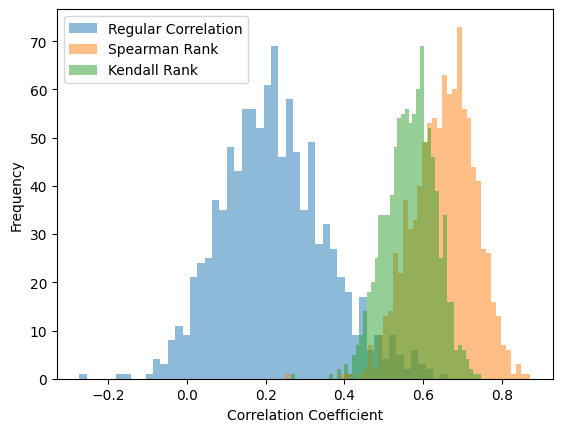

In [77]:
import matplotlib.pyplot as plt


plt.hist(correlation_dist, bins=50, alpha=0.5)
plt.hist(spearman_dist, bins=50, alpha=0.5)
plt.hist(kendall_dist, bins=50, alpha=0.5)
plt.legend(['Regular Correlation', 'Spearman Rank','Kendall Rank' ])
plt.xlabel('Correlation Coefficient')
plt.ylabel('Frequency');

Теперь попробуем поварьировать дисперсию шума. Заметно, что обе метрики снижают своё качество, но в большинстве 

Text(0, 0.5, 'Average Correlation Coefficient')

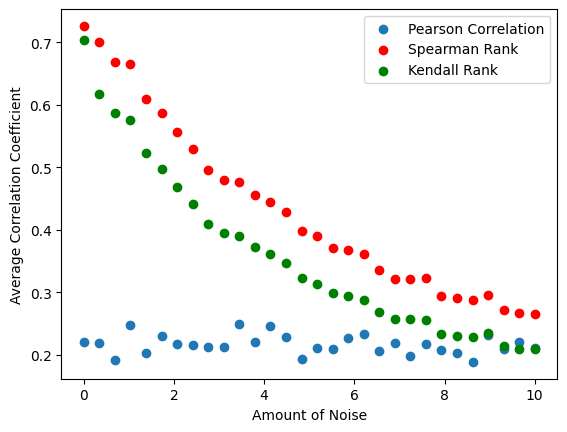

In [79]:
n = 100
noises = np.linspace(0, 10, 30)
experiments = 100
correlation = np.ndarray(len(noises))
spearman = np.ndarray(len(noises))
kendall = np.ndarray(len(noises))

for i in range(len(noises)):
    # Run many experiments for each noise setting
    pearson_coef = 0.0
    spearman_coef = 0.0
    kendall_coef = 0
    noise = noises[i]
    for j in range(experiments):
        p, s, k = compare_correlation_and_spearman_rank(n, noise)
        pearson_coef += p
        spearman_coef += s
        kendall_coef += k
    correlation[i] = pearson_coef/experiments
    spearman[i] = spearman_coef/experiments
    kendall[i] = kendall_coef/experiments
    
plt.scatter(noises, correlation)
plt.scatter(noises, spearman, color='r')
plt.scatter(noises, kendall, color='g')
plt.legend(['Pearson Correlation', 'Spearman Rank', 'Kendall Rank'])
plt.xlabel('Amount of Noise')
plt.ylabel('Average Correlation Coefficient')

# Линейная регрессия

Что такое линейная регрессия?
модель
$y=β_0+\beta_1 X+ϵ$




В векторном виде:
$\beta =(X^{T}X)^{-1}X^{T}Y$
(формула линейной проекции)


**Reminder**

Повторение формул производных по вектору  $a$ - константа, $x$ - переменная, $A$ - константная матрица


1.   $\frac{\partial a^{T}x}{\partial x} = \frac{\partial x^{T}a}{\partial x} = a$
2.   $\frac{\partial x^{T}Ax}{\partial x} = (A^{T}+A)x$

3.    $\frac{\partial Ax^{T}a}{\partial x} = A^{T}a $

4.    $\frac{\partial a^{T}xA^{T}}{\partial x} = aA^{T} $

$\frac{\partial \sum_{i=1}^{n} \sum_{j=1}^{n}A_{ij}x_j a_i}{\partial x_k} =  
\sum_{i=1}A_{ik} a_i  $


As $Ax = \sum_{j=1}A_{ij} x_j$












## МНК





### Векторная форма:
Где $Y\in R^{n}$
$\|Y- X \beta\|_{2}^{2} = (Y- X \beta)^{T}(Y- X \beta) → min$


По условию первого порядка, для $\beta$:
$\frac{\partial (Y- X \beta)^{T}(Y- X \beta)}{\partial \beta} =\frac{\partial (Y^{T}Y+  \beta^{T} X^{T} X \beta- \beta^{T}X^{T} Y- Y^{T}X \beta )}{\partial \beta} = 2 X^{T} X \beta  - 2 X^{T} Y  $.

 А $YY^{T}$ не зависит от $\beta$.

Отсюда $\beta = (X^{T} X)^{-1} X^{T} Y $

Геометрическая интепретация:

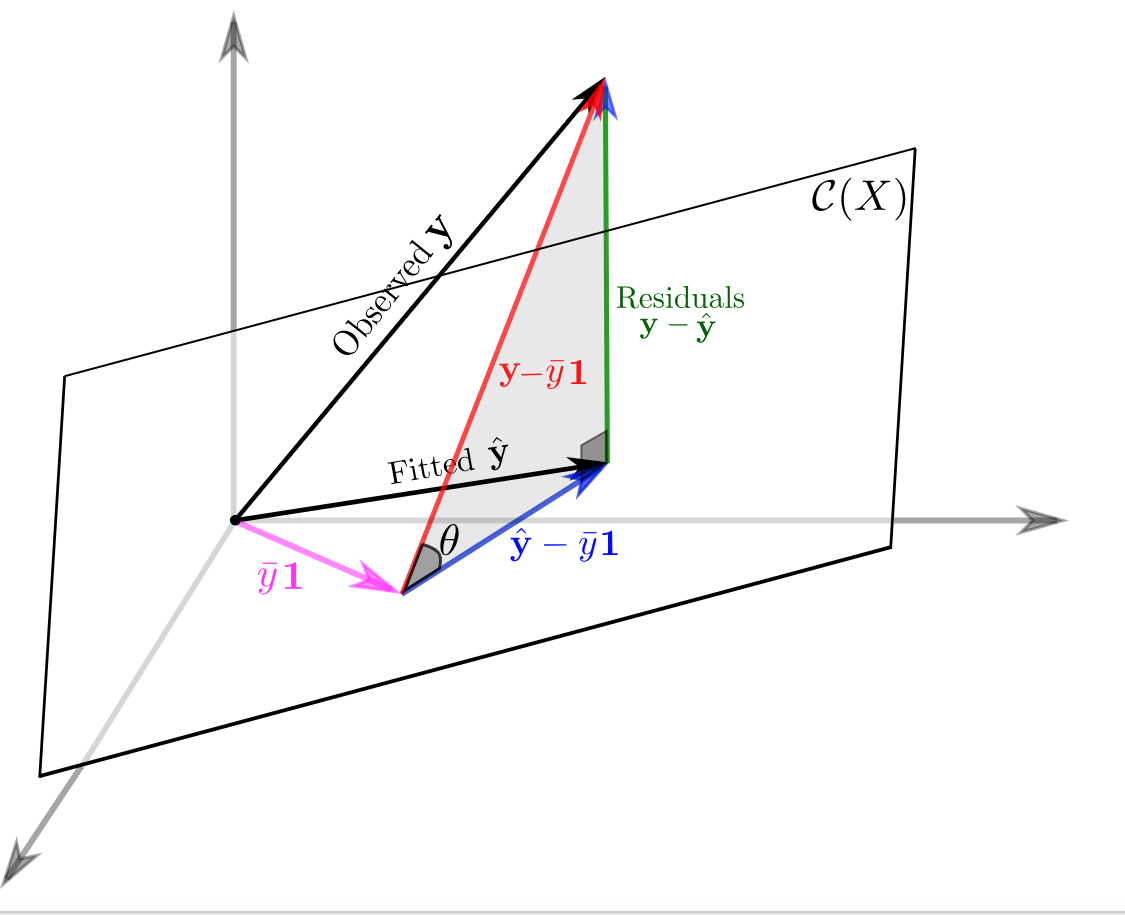

## F-test:

Линейные ограничения:
* p - количество переменных в линейной регрессии (размерность вектора $\beta$)
* r -количество линейных ограничений (ранг матрицы ограничений $A$)

* $H_0: A \beta = c$
* $H_1: A \beta \neq c$


* $\beta_{R}$ это оценка линейной ресгрессии с ограничениями:
$\beta_{R} = argmin_{\beta: A \beta = c }\| Y - X \beta \|$

* $\beta_{UR}$ это оценка линейной ресгрессии без ограничений: $\beta_{UR} = argmin_{\beta}\| Y - X \beta \|$

* $$F_{st} = \frac{(\| Y - X \beta_{R} \|^{2} - \| Y - X \beta_{UR} \|^{2})/r}{\| Y - X \beta_{UR}\|^{2}/(n - p)} =\frac{(RSS_{R} - RSS_{UR})/r}{ RSS_{UR}/(n-p)}  \sim F(r,n-p)$$

Подумайте, почему $\| Y - X \beta_{R} \| - \| Y - X \beta_{UR} \| = RSS_{R} - RSS_{UR} ≥ 0$?


## Примеры

https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset

Coefficients: 
 [953.3606272]
Mean squared error: 3752.77
Coefficient of determination: 0.38


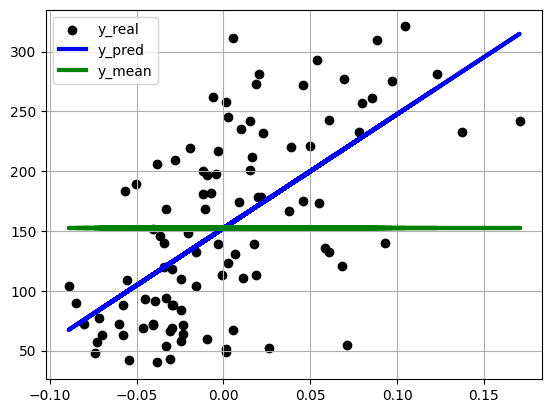

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-100]
diabetes_X_test = diabetes_X[-100:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-100]
diabetes_y_test = diabetes_y[-100:]

# Create linear regression object
regr = LinearRegression(fit_intercept = True,)

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black", label='y_real')
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3, label='y_pred')
plt.plot(diabetes_X_test, np.full((len(diabetes_X_test), 1), diabetes_y_test.mean()),
         color='green', linewidth=3, label='y_mean')

plt.legend()
plt.grid()
plt.xticks()
plt.yticks()

plt.show()

In statmodels
https://www.statsmodels.org/devel/datasets/index.html

Как на доход влияет уровень образования:

In [61]:
import statsmodels.api as sm
import numpy as np
duncan_prestige = sm.datasets.get_rdataset("Duncan", "carData")
Y = duncan_prestige.data['income']
X = duncan_prestige.data['education']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     47.51
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           1.84e-08
Time:                        00:49:05   Log-Likelihood:                -190.42
No. Observations:                  45   AIC:                             384.8
Df Residuals:                      43   BIC:                             388.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.6035      5.198      2.040      0.048       0.120      21.087
education      0.5949      0.086      6.893      0.000       0.421       0.769
==============================================================================
Omnibus:                        9.841   Durbin-Watson:                   1.736
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.609
Skew:                           0.776   Prob(JB):                      0.00497
Kurtosis:                       4.802   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""